# Red Wine Quality - 와인 품질 분석 및 예측 프로젝트

이 노트북은 Kaggle의 [Red Wine Quality 데이터셋](https://www.kaggle.com/datasets/uciml/red-wine-quality-cortez-et-al-2009/data)을 기반으로 와인의 다양한 화학적 특성을 분석하고, 이를 통해 와인의 품질을 예측하는 분류 모델을 구축하는 과정을 담고 있습니다.

## 데이터셋 정보: Red Wine Quality
- **데이터 출처**: UCI Machine Learning Repository (Cortez et al., 2009)
- **데이터 구성**: 1,599개의 레드 와인 샘플 데이터
- **입력 변수 (화학적 특성)**:
  1. **fixed acidity**: 고정 산도 (와인의 산성도를 결정하는 주요 요소)
  2. **volatile acidity**: 휘발성 산도 (높을 경우 식초 맛이 남)
  3. **citric acid**: 구연산 (와인의 신선함을 더해주는 성분)
  4. **residual sugar**: 잔여 당분 (발효 후 남은 설탕 양)
  5. **chlorides**: 염화물 (와인의 짠맛 유발 성분)
  6. **free sulfur dioxide**: 유리 이산화황 (산화 방지 및 미생물 번식 억제)
  7. **total sulfur dioxide**: 총 이산화황 (이산화황의 총량)
  8. **density**: 밀도 (수분, 알코올, 당분의 비율에 따라 결정)
  9. **pH**: 산성도 (와인의 알칼리/산성 수준)
  10. **sulphates**: 황산염 (이산화황 수준을 촉진하는 첨가제)
  11. **alcohol**: 알코올 도수
- **출력 변수 (타겟)**:
  - **quality**: 와인 품질 (0~10 사이의 점수, 0은 최하, 10은 최상)

## 분석 및 모델링 목표
- 데이터의 상관관계 및 특성을 파악하기 위한 EDA 수행
- 고품질(Good)과 저품질(Bad)을 나누는 이진 분류 형태의 특성 엔지니어링 수행
- 8가지 다양한 머신러닝 모델 학습 및 상위 4개 모델 기반의 하이퍼파라미터 튜닝 및 앙상블 수행

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# 모델 라이브러리 (8가지)
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, ExtraTreesClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import VotingClassifier

warnings.filterwarnings('ignore')

# 한글 폰트 설정 (Windows 기준)
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

# 데이터 로드 (UCI 저장소 URL 혹은 로컬 파일)
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv"
try:
    df = pd.read_csv(url, sep=';')
    print("데이터를 온라인에서 성공적으로 불러왔습니다.")
except:
    print("데이터 로드에 실패했습니다. 로컬에 파일이 있는지 확인하세요.")

print(f"데이터 크기: {df.shape}")
display(df.head())

데이터를 온라인에서 성공적으로 불러왔습니다.
데이터 크기: (1599, 12)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


## 1. 탐색적 데이터 분석 (EDA)

In [2]:
# 결측치 확인 및 기본 정보
print(df.info())
print("\n--- 결측치 개수 ---")
print(df.isnull().sum())

# 기초 통계량 확인
display(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB
None

--- 결측치 개수 ---
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
c

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [ ]:
df(Quality)

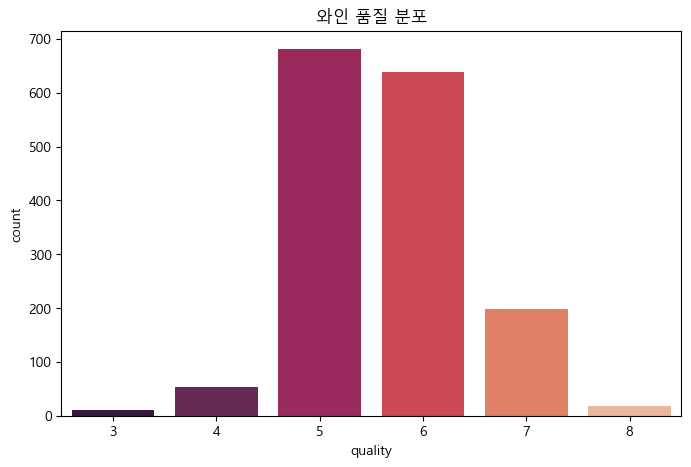

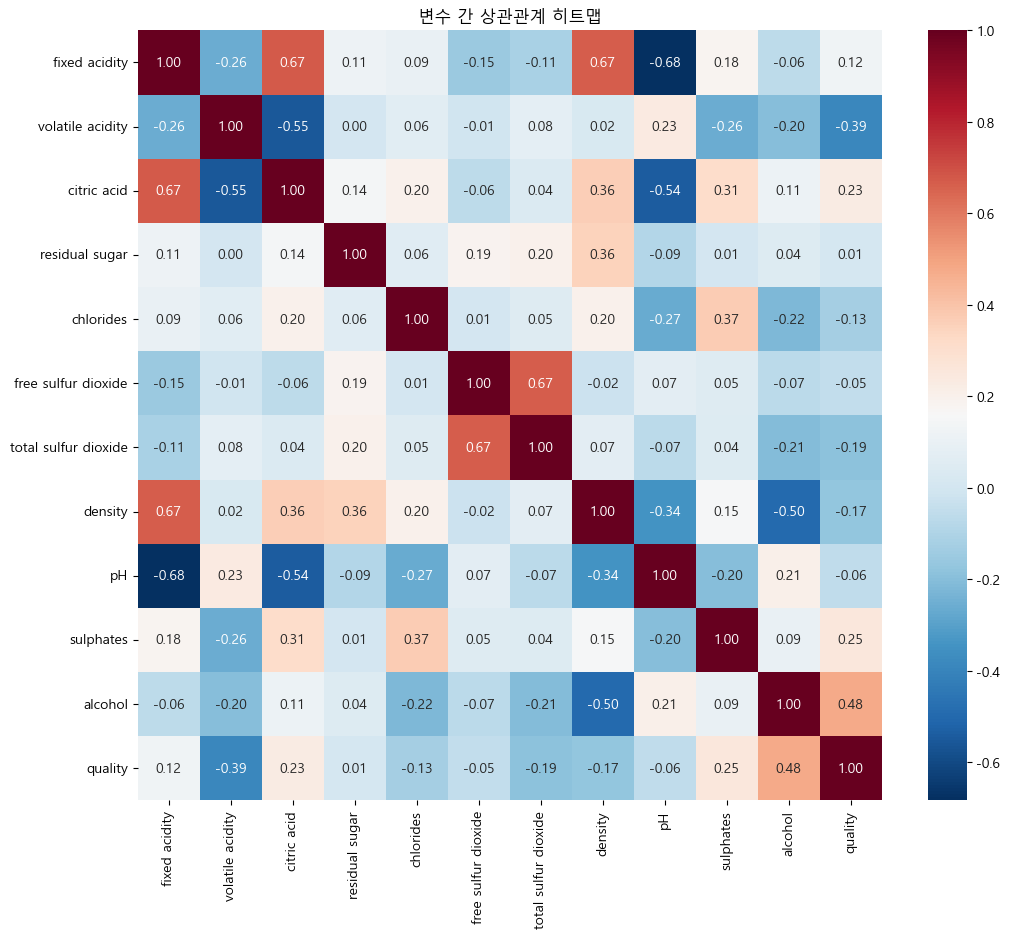

In [3]:
# 품질(quality) 분포 시각화
plt.figure(figsize=(8, 5))
sns.countplot(x='quality', data=df, palette='rocket')
plt.title('와인 품질 분포')
plt.show()

# 변수 간 상관관계 분석
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), annot=True, cmap='RdBu_r', fmt='.2f')
plt.title('변수 간 상관관계 히트맵')
plt.show()

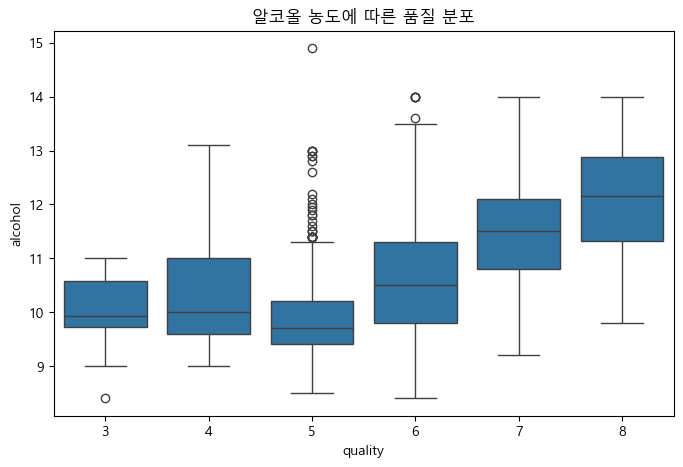

In [5]:
# 알코올 농도와 품질의 관계
plt.figure(figsize=(8, 5))
sns.boxplot(x='quality', y='alcohol', data=df)
plt.title('알코올 농도에 따른 품질 분포')
plt.show()

## 2. 데이터 전처리 및 특성 엔지니어링

In [6]:
# 특성 엔지니어링: 품질 값을 이진 분류(Good/Bad)로 변환
# 7점 이상을 'Good(1)', 6점 이하를 'Bad(0)'로 정의 (일반적인 기준)
bins = (2, 6.5, 8)
group_names = ['bad', 'good']
df['quality_label'] = pd.cut(df['quality'], bins = bins, labels = group_names)

# Label Encoding
label_quality = LabelEncoder()
df['quality_label'] = label_quality.fit_transform(df['quality_label'])

print("처리 후 품질 분류 분포:")
print(df['quality_label'].value_counts())

# 독립 변수(X)와 종속 변수(y) 설정
X = df.drop(['quality', 'quality_label'], axis=1)
y = df['quality_label']

# 학습 데이터와 테스트 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# 데이터 스케일링
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(f"\n학습 데이터 크기: {X_train_scaled.shape}")

처리 후 품질 분류 분포:
quality_label
0    1382
1     217
Name: count, dtype: int64

학습 데이터 크기: (1279, 11)


In [12]:
# !pip install imbalanced-learn

In [17]:
from imbalearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train_scaled, y_train)
print(pd.Series(y_train[:]).value_counts())
print(pd.Series(y_train_res[:]).value_counts())

ModuleNotFoundError: No module named 'imbalearn'

## 3. 모델링 (8가지 기초 모델 사용)

In [7]:
# 8개 모델 정의
models = {
    'LogisticRegression': LogisticRegression(max_iter=10000, random_state=42),
    'RandomForest': RandomForestClassifier(random_state=42),
    'SVC': SVC(random_state=42, probability=True),
    'KNN': KNeighborsClassifier(),
    'DecisionTree': DecisionTreeClassifier(random_state=42),
    'GradientBoosting': GradientBoostingClassifier(random_state=42),
    'AdaBoost': AdaBoostClassifier(random_state=42),
    'ExtraTrees': ExtraTreesClassifier(random_state=42)
}

# 교차 검증을 통한 성능 비교
results = {}
for name, model in models.items():
    cv_scores = cross_val_score(model, X_train_scaled, y_train, cv=5)
    results[name] = cv_scores.mean()
    print(f"{name} CV Accuracy: {cv_scores.mean():.4f}")

# 성능 기준 내림차순 정렬
sorted_results = sorted(results.items(), key=lambda x: x[1], reverse=True)
print("\n--- 모델 성능 순위 ---")
for i, (name, score) in enumerate(sorted_results):
    print(f"{i+1}. {name}: {score:.4f}")

LogisticRegression CV Accuracy: 0.8733
RandomForest CV Accuracy: 0.8968
SVC CV Accuracy: 0.8780
KNN CV Accuracy: 0.8593
DecisionTree CV Accuracy: 0.8569
GradientBoosting CV Accuracy: 0.8819
AdaBoost CV Accuracy: 0.8687
ExtraTrees CV Accuracy: 0.8991

--- 모델 성능 순위 ---
1. ExtraTrees: 0.8991
2. RandomForest: 0.8968
3. GradientBoosting: 0.8819
4. SVC: 0.8780
5. LogisticRegression: 0.8733
6. AdaBoost: 0.8687
7. KNN: 0.8593
8. DecisionTree: 0.8569


## 4. 하이퍼 파라미터 튜닝 및 상위 4개 모델 선정

In [8]:
# 상위 4개 모델 선정
top_4_model_names = [name for name, score in sorted_results[:4]]
print(f"선정된 상위 4개 모델: {top_4_model_names}")

best_estimators = {}

# 각 상위 모델별 그리드 서치 수행
for name in top_4_model_names:
    print(f"{name} 튜닝 시작...")
    
    if name == 'RandomForest':
        param = {'n_estimators': [100, 200], 'max_depth': [None, 10, 20]}
        grid = GridSearchCV(RandomForestClassifier(random_state=42), param, cv=3)
    elif name == 'ExtraTrees':
        param = {'n_estimators': [100, 200], 'max_depth': [None, 10, 20]}
        grid = GridSearchCV(ExtraTreesClassifier(random_state=42), param, cv=3)
    elif name == 'SVC':
        param = {'C': [0.1, 1, 10], 'gamma': ['scale', 0.1, 0.01]}
        grid = GridSearchCV(SVC(probability=True, random_state=42), param, cv=3)
    elif name == 'GradientBoosting':
        param = {'n_estimators': [50, 100], 'learning_rate': [0.05, 0.1]}
        grid = GridSearchCV(GradientBoostingClassifier(random_state=42), param, cv=3)
    elif name == 'LogisticRegression':
        param = {'C': [0.1, 1, 10], 'solver': ['liblinear', 'lbfgs']}
        grid = GridSearchCV(LogisticRegression(max_iter=10000, random_state=42), param, cv=3)
    elif name == 'KNN':
        param = {'n_neighbors': [3, 5, 7, 9], 'weights': ['uniform', 'distance']}
        grid = GridSearchCV(KNeighborsClassifier(), param, cv=3)
    elif name == 'AdaBoost':
        param = {'n_estimators': [50, 100], 'learning_rate': [0.5, 1.0]}
        grid = GridSearchCV(AdaBoostClassifier(random_state=42), param, cv=3)
    else: # DecisionTree 등
        param = {'max_depth': [None, 5, 10, 15]}
        grid = GridSearchCV(models[name], param, cv=3)
        
    grid.fit(X_train_scaled, y_train)
    best_estimators[name] = grid.best_estimator_
    print(f"{name} 최적 파라미터: {grid.best_params_}")

print("튜닝 완료!")

선정된 상위 4개 모델: ['ExtraTrees', 'RandomForest', 'GradientBoosting', 'SVC']
ExtraTrees 튜닝 시작...
ExtraTrees 최적 파라미터: {'max_depth': None, 'n_estimators': 100}
RandomForest 튜닝 시작...
RandomForest 최적 파라미터: {'max_depth': None, 'n_estimators': 100}
GradientBoosting 튜닝 시작...
GradientBoosting 최적 파라미터: {'learning_rate': 0.1, 'n_estimators': 100}
SVC 튜닝 시작...
SVC 최적 파라미터: {'C': 1, 'gamma': 'scale'}
튜닝 완료!


## 5. 앙상블 모델 구축 (Soft Voting)

In [9]:
# 튜닝된 상위 4개 모델로 앙상블 구성
estimators = [(name, clf) for name, clf in best_estimators.items()]
voting_clf = VotingClassifier(estimators=estimators, voting='soft')

# 앙상블 모델 학습
voting_clf.fit(X_train_scaled, y_train)
print(f"앙상블 포함 모델: {[name for name, _ in estimators]}")

앙상블 포함 모델: ['ExtraTrees', 'RandomForest', 'GradientBoosting', 'SVC']


## 6. 최종 모델 평가

--- 최종 앙상블 모델 평가 ---
Accuracy Score: 0.9375

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.99      0.96       277
           1       0.93      0.58      0.71        43

    accuracy                           0.94       320
   macro avg       0.93      0.79      0.84       320
weighted avg       0.94      0.94      0.93       320



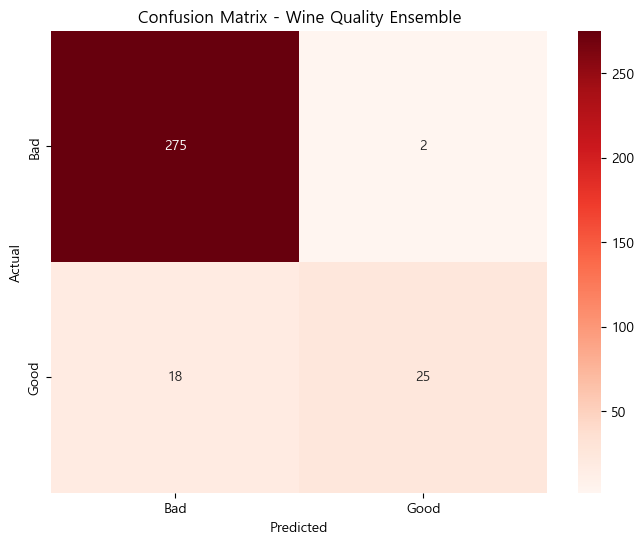

In [10]:
# 테스트 데이터에 대해 예측
y_pred = voting_clf.predict(X_test_scaled)

print("--- 최종 앙상블 모델 평가 ---")
print(f"Accuracy Score: {accuracy_score(y_test, y_pred):.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# 혼동 행렬 시각화
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds', xticklabels=['Bad', 'Good'], yticklabels=['Bad', 'Good'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Wine Quality Ensemble')
plt.show()